<a href="https://colab.research.google.com/github/roy-sub/Feature-Analysis-of-Deep-Learning-Model/blob/main/GeMAPS/VAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Divide the Original Dataset Based on "emo_attr"**

In [1]:
# Specify the original dataset_path

originial_dataset = '/content/GeMAPS.xlsx'

In [2]:
import pandas as pd

df = pd.read_excel(originial_dataset)

# Assuming df is your original DataFrame
unique_values = df['emo_attr'].unique()

# Create and save separate DataFrames for each unique value
for value in unique_values:
    df_n = df[df['emo_attr'] == value]
    globals()[f'df_{value}'] = df_n
    df_n.to_csv(f'df_{value}.csv', index=False)
    print(f"Number of rows in df_{value}: {len(df_n)}")

print(f"Number of rows in df    : {len(df)}")

Number of rows in df_Dom: 160
Number of rows in df_Act: 240
Number of rows in df_Val: 160
Number of rows in df    : 560


#**Visualizing the variation of "Testing Avg CCC" with "Unique Sets of Hyper parameters"**

In [3]:
# Re-assigining the dataframe variable to the sub dataframe

import pandas as pd

df_VAL = pd.read_csv('/content/df_Val.csv')
df = df_VAL

In [4]:
df.head()

,Created,Runtime,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,2024-03-15T13:37:23.000Z,394,23,Val,opensmile_egemaps,128,512,2000,0.0005,all,0.038494
1,2024-03-15T13:30:45.000Z,391,23,Val,opensmile_egemaps,64,128,2000,0.0003,all,0.012625
2,2024-03-15T13:23:30.000Z,432,23,Val,opensmile_egemaps,128,512,2000,0.0005,all,0.035397
3,2024-03-15T13:16:41.000Z,407,23,Val,opensmile_egemaps,64,128,2000,0.0003,all,0.030101
4,2024-03-15T13:09:37.000Z,420,23,Val,opensmile_egemaps,64,128,2000,0.0005,all,0.022365


In [5]:
df.tail()

,Created,Runtime,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
155,2024-03-15T05:45:39.000Z,572,23,Val,opensmile_egemaps,512,64,2000,0.0003,std,-0.011080
156,2024-03-15T05:36:56.000Z,547,23,Val,opensmile_egemaps,64,64,2000,0.0005,var,-0.019377
157,2024-03-15T05:27:23.000Z,569,23,Val,opensmile_egemaps,64,64,2000,0.0005,var,0.012509
158,2024-03-15T05:10:43.000Z,997,23,Val,opensmile_egemaps,512,256,2000,0.0001,var,-0.003514
159,2024-03-15T04:51:38.000Z,1143,23,Val,opensmile_egemaps,512,256,2000,0.0001,var,-0.000906


In [6]:
statistics = df['Testing Avg CCC'].describe()

# Print the statistics
statistics

count    160.000000
mean       0.019469
std        0.020194
min       -0.023370
25%        0.004355
50%        0.016226
75%        0.036462
max        0.062559
Name: Testing Avg CCC, dtype: float64

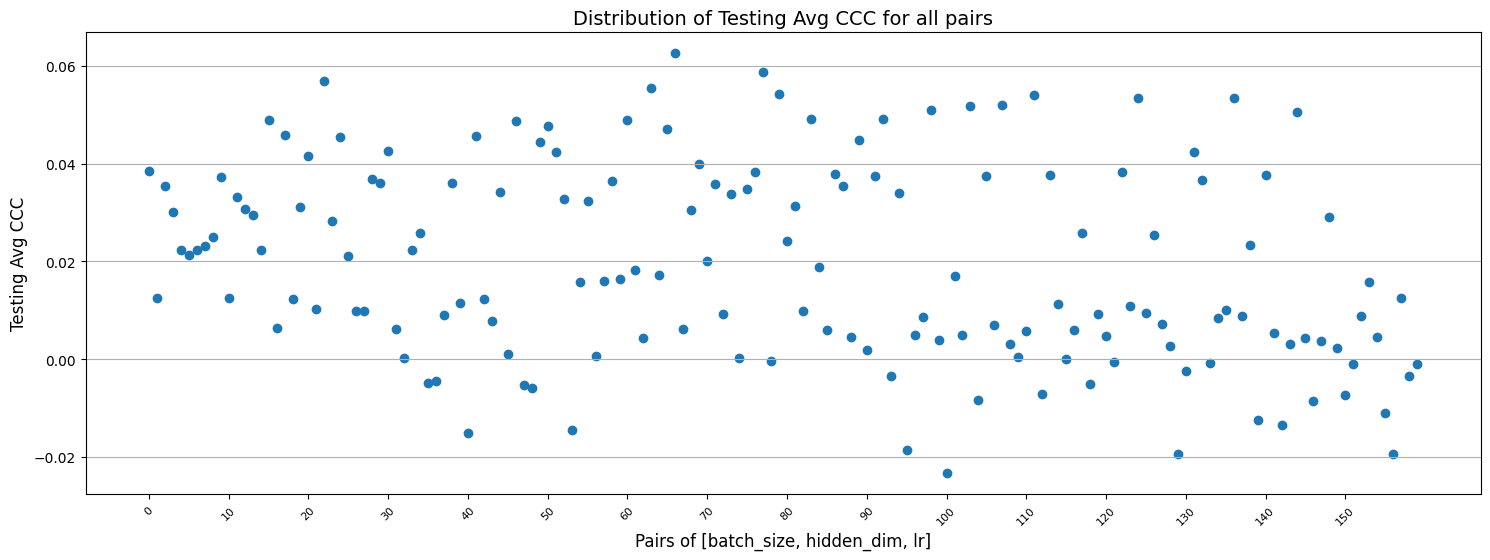

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(18, 6))
plt.scatter(range(len(df)), df['Testing Avg CCC'])
plt.xlabel('Pairs of [batch_size, hidden_dim, lr]', fontsize=12)
plt.ylabel('Testing Avg CCC', fontsize=12)
plt.title('Distribution of Testing Avg CCC for all pairs', fontsize=14)
plt.xticks(range(0, len(df), 10), df.index[::10], rotation=45, fontsize=8)
plt.grid(axis='y')
plt.show()

In [8]:
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()
unique_pairs

,batch_size,hidden_dim,lr
0,128,512,0.0005
1,64,128,0.0003
4,64,128,0.0005
5,512,64,0.0005
6,64,256,0.0001
7,64,256,0.0003
9,512,512,0.0005
13,128,256,0.0001
15,64,512,0.0001
16,512,128,0.0003


In [9]:
len(unique_pairs) # must be <= 36

32

In [11]:
import pandas as pd

# Get unique pairs of ['batch_size', 'hidden_dim', 'lr']
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()

# Create an empty DataFrame to store the result
df_new = pd.DataFrame(columns=['unique pairs of hyperparameters', 'Testing Avg CCCs'])

# Iterate over unique pairs and collect Testing Avg CCC values
for index, row in unique_pairs.iterrows():
    mask = (df['batch_size'] == row['batch_size']) & \
           (df['hidden_dim'] == row['hidden_dim']) & \
           (df['lr'] == row['lr'])
    testing_avg_ccc_values = df[mask]['Testing Avg CCC'].tolist()
    hyperparameters_list = [row['batch_size'], row['hidden_dim'], row['lr']]
    df_to_append = pd.DataFrame({'unique pairs of hyperparameters': [hyperparameters_list], 'Testing Avg CCCs': [testing_avg_ccc_values]})
    df_new = pd.concat([df_new, df_to_append], ignore_index=True)

df_new.head()

,unique pairs of hyperparameters,Testing Avg CCCs
0,"[128.0, 512.0, 0.0005]","[0.0384936542560656, 0.03539749532938, 0.02492..."
1,"[64.0, 128.0, 0.0003]","[0.0126254075594867, 0.0301014618637661, 0.030..."
2,"[64.0, 128.0, 0.0005]","[0.0223649870293835, 0.0543171748518943, 0.052..."
3,"[512.0, 64.0, 0.0005]","[0.0212638277560472, 0.0010530668621261, 0.032..."
4,"[64.0, 256.0, 0.0001]","[0.0222545801972349, 0.0343099878480037, 0.036..."


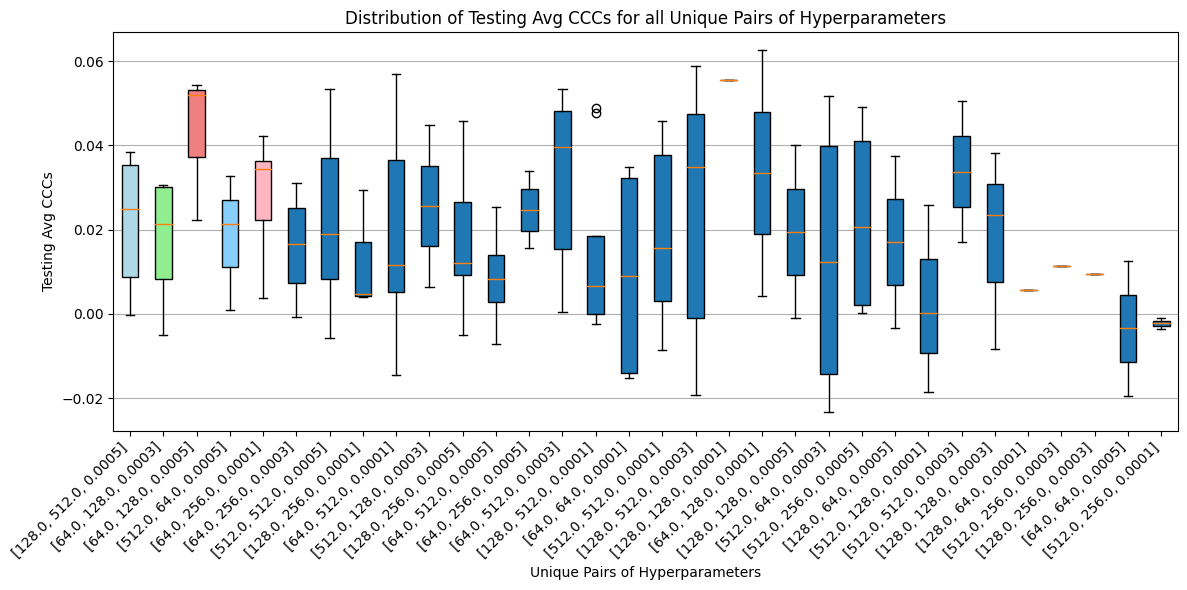

In [12]:
# Diagrammatic Representation
plt.figure(figsize=(12, 6))
box = plt.boxplot(df_new['Testing Avg CCCs'], labels=df_new['unique pairs of hyperparameters'], patch_artist=True)

# Customizing boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

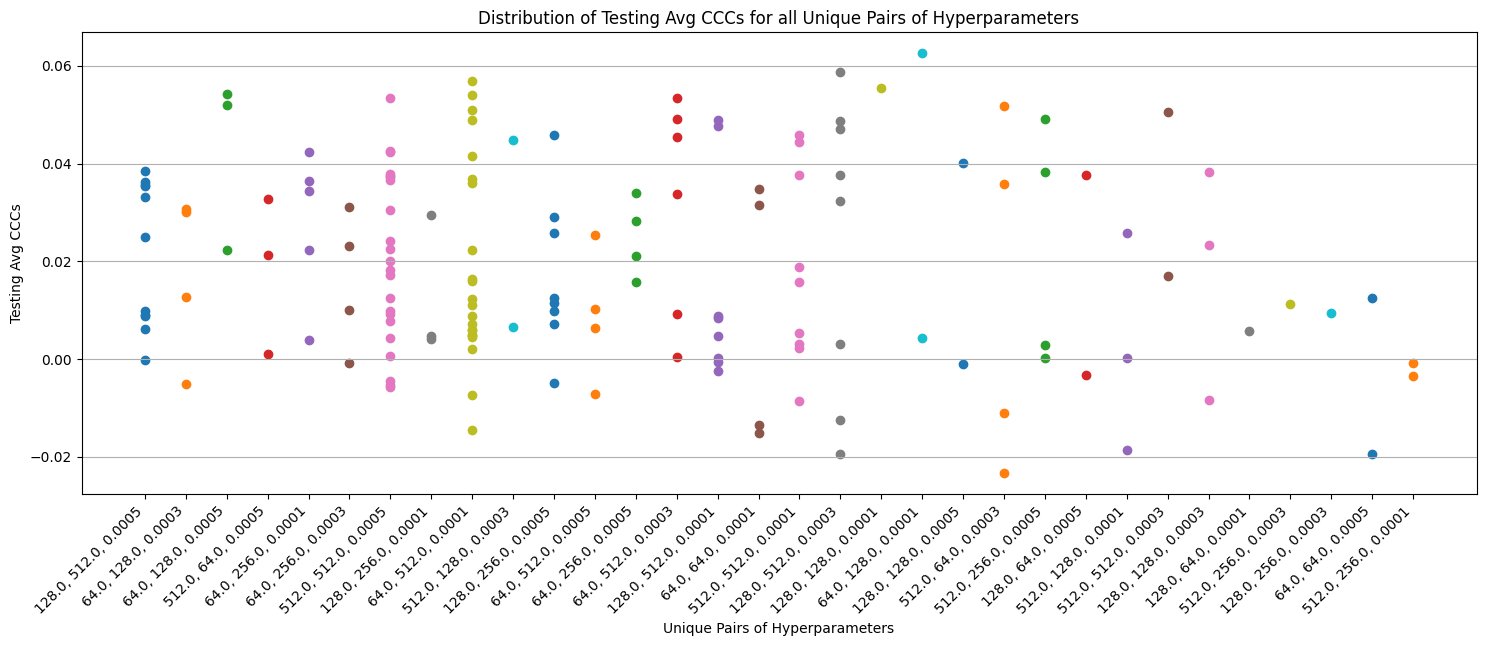

In [13]:
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame

# Create a scatter plot
plt.figure(figsize=(18, 6))
for i, row in df_new.iterrows():
    pair_str = ', '.join([str(x) for x in row['unique pairs of hyperparameters']])
    plt.scatter([pair_str]*len(row['Testing Avg CCCs']), row['Testing Avg CCCs'], label=pair_str)

plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#**Filter the Dataframe based on the "Unique Set of Hyper Parameneter"**

In [15]:
# Assigning batch_size,	hidden_dim and lr to the selected values

[batch_size_high_ccc,	hidden_dim_high_ccc, lr_high_ccc] = [64.0, 128.0, 0.0005]
[batch_size_low_ccc,	hidden_dim_low_ccc, lr_low_ccc] = [128.0, 512.0, 0.0001]
[batch_size_sparse_ccc,	hidden_dim_sparse_ccc, lr_spare_ccc] = [64.0, 512.0, 0.0001]

print(f"batch_size_high_ccc : {batch_size_high_ccc} \nhidden_dim_high_ccc : {hidden_dim_high_ccc} \nlr_high_ccc : {lr_high_ccc}\n")
print(f"batch_size_low_ccc : {batch_size_low_ccc} \nhidden_dim_low_ccc : {hidden_dim_low_ccc} \nlr_high_ccc : {lr_low_ccc}\n")
print(f"batch_size_sparse_ccc : {batch_size_sparse_ccc} \nhidden_dim_sparse_ccc : {hidden_dim_sparse_ccc} \nlr_spare_ccc : {lr_spare_ccc}")

batch_size_high_ccc : 64.0 
hidden_dim_high_ccc : 128.0 
lr_high_ccc : 0.0005

batch_size_low_ccc : 128.0 
hidden_dim_low_ccc : 512.0 
lr_high_ccc : 0.0001

batch_size_sparse_ccc : 64.0 
hidden_dim_sparse_ccc : 512.0 
lr_spare_ccc : 0.0001


In [16]:
df_filtered_high = df[(df['batch_size'] == batch_size_high_ccc) & (df['hidden_dim'] == hidden_dim_high_ccc) & (df['lr'] == lr_high_ccc)]
df_filtered_low = df[(df['batch_size'] == batch_size_low_ccc) & (df['hidden_dim'] == hidden_dim_low_ccc) & (df['lr'] == lr_low_ccc)]
df_filtered_sparse = df[(df['batch_size'] == batch_size_sparse_ccc) & (df['hidden_dim'] == hidden_dim_sparse_ccc) & (df['lr'] == lr_spare_ccc)]

In [17]:
df_filtered_high = df_filtered_high.reset_index(drop=True)
df_filtered_low = df_filtered_low.reset_index(drop=True)
df_filtered_sparse = df_filtered_sparse.reset_index(drop=True)

In [18]:
df_filtered_high.head()

,Created,Runtime,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,2024-03-15T13:09:37.000Z,420,23,Val,opensmile_egemaps,64,128,2000,0.0005,all,0.022365
1,2024-03-15T08:41:36.000Z,503,23,Val,opensmile_egemaps,64,128,2000,0.0005,median,0.054317
2,2024-03-15T07:48:03.000Z,546,23,Val,opensmile_egemaps,64,128,2000,0.0005,median,0.052037


In [19]:
df_filtered_low.head()

,Created,Runtime,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,2024-03-15T10:31:59.000Z,559,23,Val,opensmile_egemaps,128,512,2000,0.0001,min,0.000230
1,2024-03-15T09:43:08.000Z,603,23,Val,opensmile_egemaps,128,512,2000,0.0001,mean,0.047722
2,2024-03-15T09:23:10.000Z,605,23,Val,opensmile_egemaps,128,512,2000,0.0001,mean,0.048911
3,2024-03-15T08:22:00.000Z,629,23,Val,opensmile_egemaps,128,512,2000,0.0001,min,0.004637
4,2024-03-15T07:23:07.000Z,434,23,Val,opensmile_egemaps,128,512,2000,0.0001,var,-0.000509


In [20]:
df_filtered_sparse.head()

,Created,Runtime,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,2024-03-15T11:12:29.000Z,693,23,Val,opensmile_egemaps,64,512,2000,0.0001,none,0.048940
1,2024-03-15T11:00:44.000Z,698,23,Val,opensmile_egemaps,64,512,2000,0.0001,none,0.012384
2,2024-03-15T10:56:02.000Z,528,23,Val,opensmile_egemaps,64,512,2000,0.0001,median,0.041646
3,2024-03-15T10:49:16.000Z,682,23,Val,opensmile_egemaps,64,512,2000,0.0001,none,0.056950
4,2024-03-15T10:38:11.000Z,662,23,Val,opensmile_egemaps,64,512,2000,0.0001,none,0.036843


In [21]:
print(f"df_filtered_high: {len(df_filtered_high)} \ndf_filtered_low: {len(df_filtered_low)} \ndf_filtered_sparse: {len(df_filtered_sparse)}")

df_filtered_high: 3 
df_filtered_low: 8 
df_filtered_sparse: 22


#**Perform the Analysis to Determine the Most Efficient "statistical_feature"**

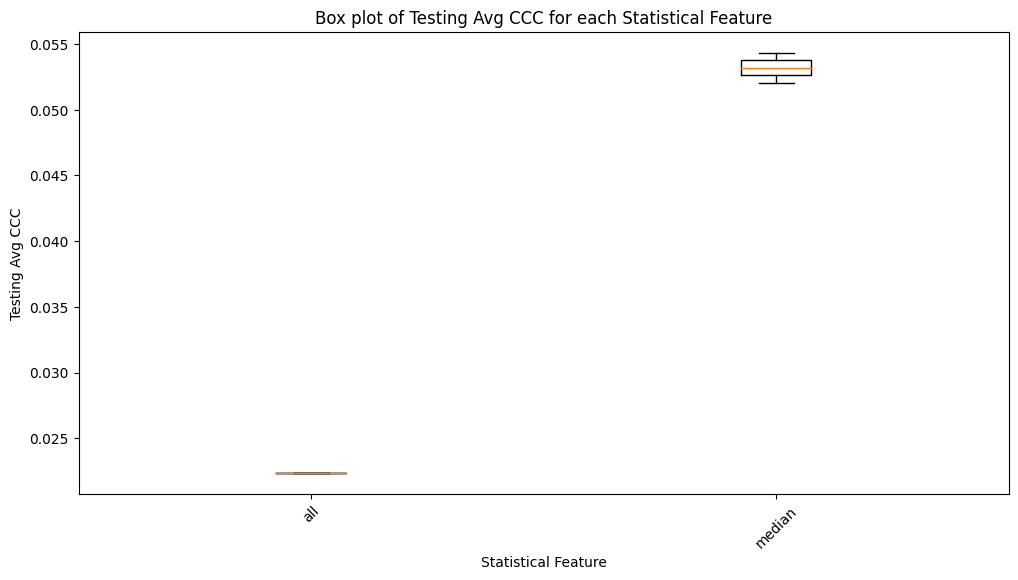

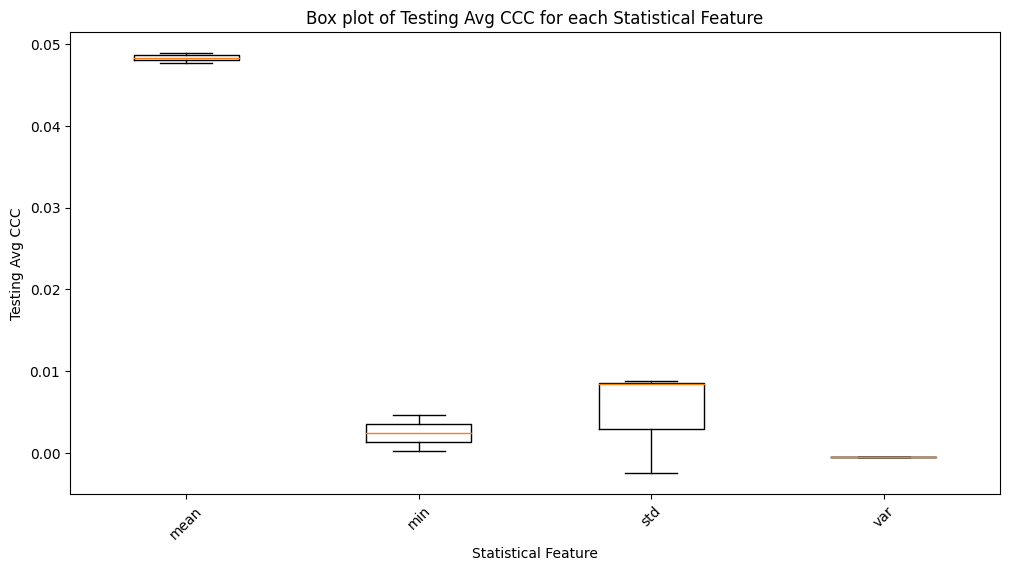

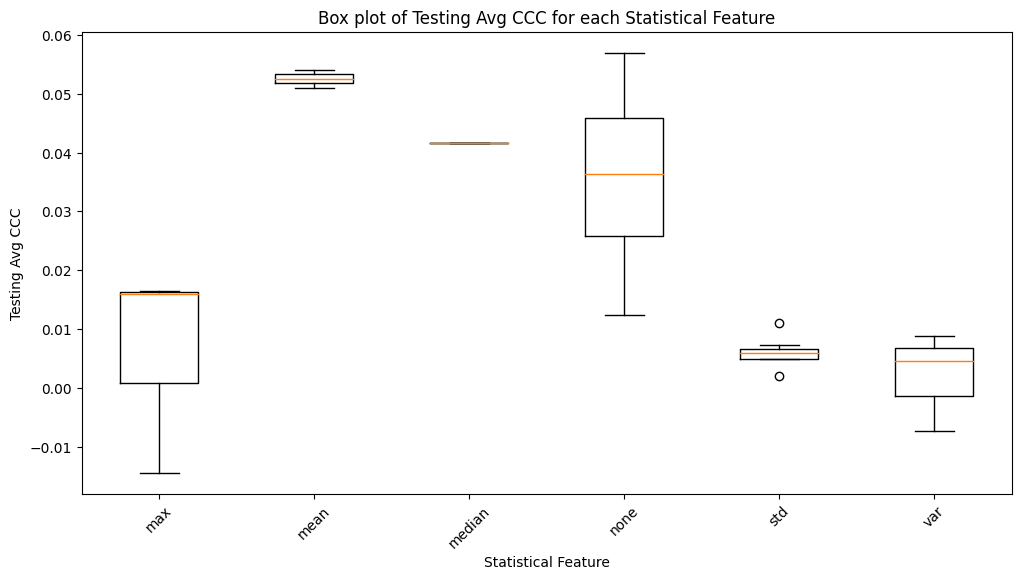

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns "statistical_feature" and "Testing Avg CCC"

# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_high.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()


# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_low.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()


# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_sparse.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

#**Advanced Analysis to Determine the Most Efficient "statistical_feature"**

In [23]:
! pip install -q eli5
! pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.1 MB/s eta 0:00:00


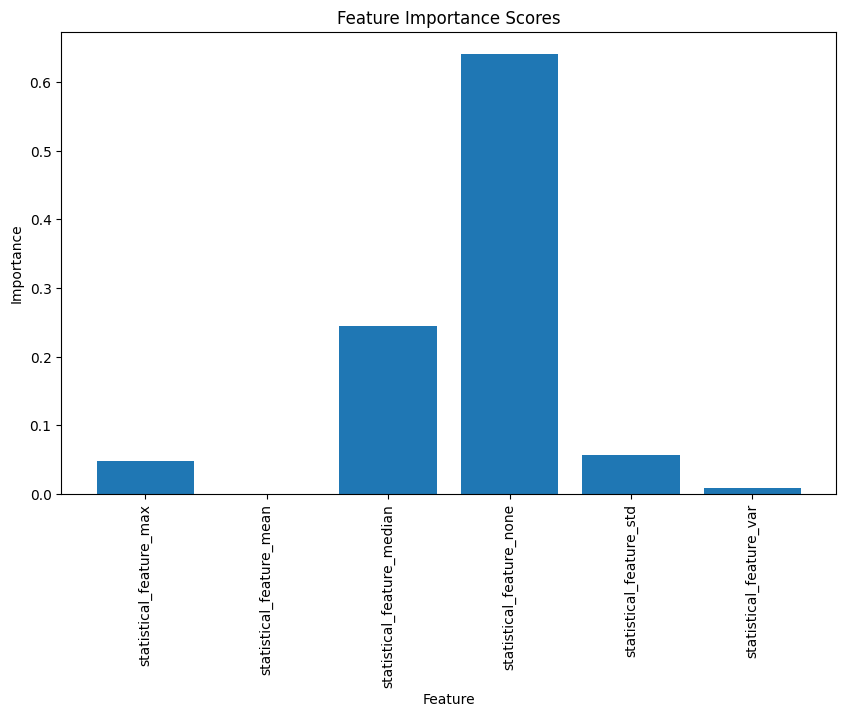

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X_s = df_filtered_sparse[['statistical_feature']]
y_s = df_filtered_sparse['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_s = pd.get_dummies(X_s)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_encoded_s, y_s, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train_s, y_train_s)

# Get feature importances
importances = model_s.feature_importances_
features = X_encoded_s.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

perm_s = PermutationImportance(model_s, random_state=42).fit(X_test_s , y_test_s )
eli5.show_weights(perm_s, feature_names=X_test_s .columns.tolist())

Weight,Feature
0.0150 ± 0.0702,statistical_feature_max
0 ± 0.0000,statistical_feature_var
0 ± 0.0000,statistical_feature_std
0 ± 0.0000,statistical_feature_median
0 ± 0.0000,statistical_feature_mean
-0.9711 ± 1.5858,statistical_feature_none


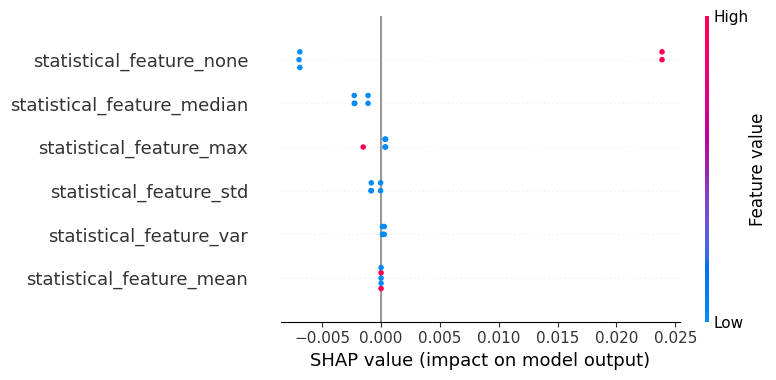

In [29]:
import shap

explainer_s = shap.TreeExplainer(model_s)
shap_values_s = explainer_s.shap_values(X_test_s)
shap.summary_plot(shap_values_s, X_test_s)